# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco Housing Market to allow potential real estate investors to choose rental investment properties. 

In [1]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import hvplot.pandas
from pathlib import Path
from dotenv import load_dotenv

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")

## Load Data

In [3]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


In [4]:
# Check datatypes of each column
datatypes = sfo_data.dtypes
print(datatypes)

type(sfo_data.index)

neighborhood            object
sale_price_sqr_foot    float64
housing_units            int64
gross_rent               int64
dtype: object


pandas.core.indexes.numeric.Int64Index

- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

In [5]:
# Calculate the mean number of housing units per year (hint: use groupby) 
housing_mean = pd.DataFrame(sfo_data["housing_units"].groupby("year").mean())
print(housing_mean)

      housing_units
year               
2010         372560
2011         374507
2012         376454
2013         378401
2014         380348
2015         382295
2016         384242


In [6]:
# Calculate the min, max, and std
housing_min = sfo_data[["housing_units"]].min()
housing_max = sfo_data[["housing_units"]].max()
housing_sd = sfo_data[["housing_units"]].std()

print(f"Minimum Value: {housing_min}")
print(f"Maximum Value: {housing_max}")
print(f"Standard Deviation: {housing_sd}")

Minimum Value: housing_units    372560
dtype: int64
Maximum Value: housing_units    384242
dtype: int64
Standard Deviation: housing_units    3823.506872
dtype: float64


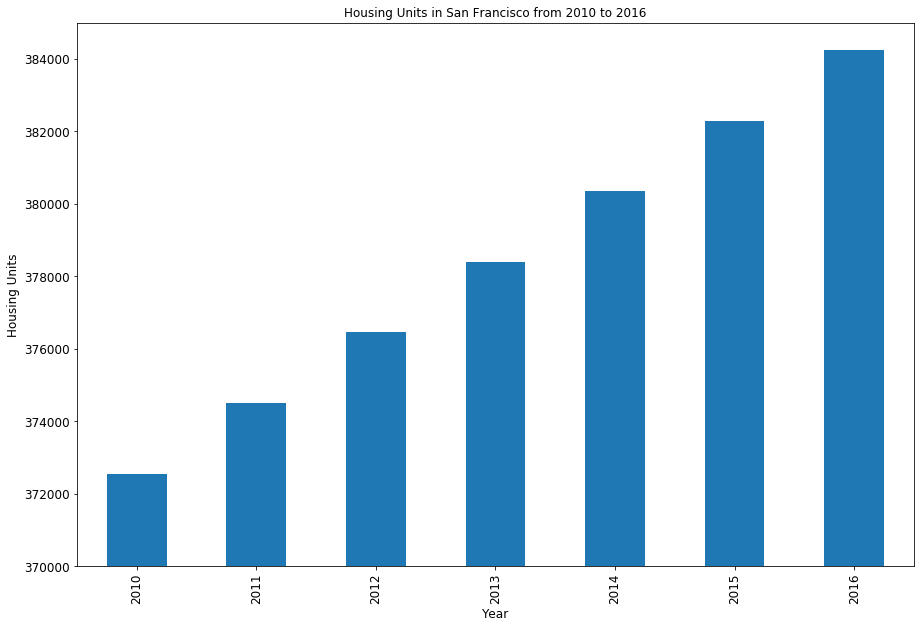

In [52]:
# Use the Pandas plot function to plot the average housing units per year.
# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
fig_housing_units = housing_mean.plot(
    kind='bar', 
    title ='Housing Units in San Francisco from 2010 to 2016', 
    figsize=(15, 10), 
    legend=False, 
    fontsize=12
    )
fig_housing_units.set_xlabel("Year", fontsize=12)
fig_housing_units.set_ylabel("Housing Units", fontsize=12)

plt.ylim(370000, 385000)
plt.show()

In [67]:
house_avg = housing_mean.hvplot.bar(
        xlabel="Year", 
        ylabel="Housing Units",
        title='Housing Units in San Francisco from 2010 to 2016', 
        width=1000, 
        height=500,
        ylim=(370000, 385000),
        yformatter='%.0f'
        )
house_avg

:Bars   [year]   (housing_units)

- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [8]:
# Calculate the average gross rent and average sale price per square foot
average_rent = pd.DataFrame(sfo_data["gross_rent"].groupby("year").mean())
average_rent

average_ppsqft = pd.DataFrame(sfo_data["sale_price_sqr_foot"].groupby("year").mean())
average_ppsqft

,sale_price_sqr_foot
year,
2010,369.344353
2011,341.903429
2012,399.389968
2013,483.600304
2014,556.277273
2015,632.540352
2016,697.643709


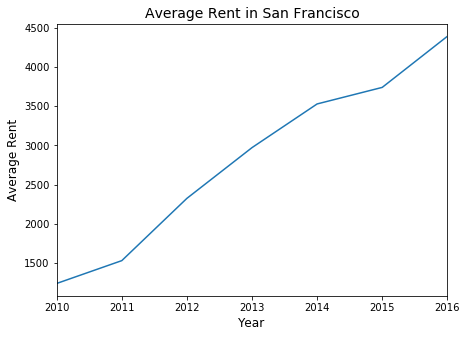

In [53]:
# Plot the Average Gross Rent per Year as a Line Chart 
average_rent_plot = average_rent.plot(
    kind='line', 
    figsize=(7, 5), 
    legend=False
    )
average_rent_plot.set_xlabel("Year", fontsize=12)
average_rent_plot.set_ylabel("Average Rent", fontsize=12)
average_rent_plot.set_title('Average Rent in San Francisco', fontsize=14)

plt.show()

In [75]:
# Comparing to hvplot
rent_avg = average_rent.hvplot.line(
    xlabel="Year", 
    ylabel="Average Rent",
    title='Average Rent in San Francisco', 
    width=600, 
    height=400,
    rot=90
    )

rent_avg

:Curve   [year]   (gross_rent)

### Average Sales Price per Year

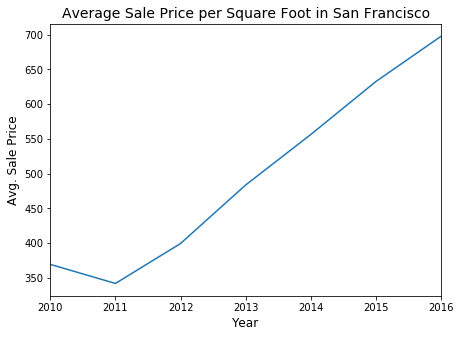

In [54]:
# Plot the Average Sales Price per Year as a line chart
average_ppsqft_plot = average_ppsqft.plot(
    kind='line', 
    figsize=(7, 5), 
    legend=False
    )
average_ppsqft_plot.set_xlabel("Year", fontsize=12)
average_ppsqft_plot.set_ylabel("Avg. Sale Price", fontsize=12)
average_ppsqft_plot.set_title('Average Sale Price per Square Foot in San Francisco', fontsize=14)

plt.show()

In [78]:
# Comparing to hvplot
ppsqft_avg = average_ppsqft.hvplot.line(
    xlabel="Year", 
    rot=90,
    ylabel="Avg. Sale Price",
    title='Average Sales Price per Square Foot in San Francisco', 
    width=600, 
    height=400,
    )

ppsqft_avg

:Curve   [year]   (sale_price_sqr_foot)

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [11]:
# Group by year and neighborhood and then create a new dataframe of the mean values
neighborhood = (
    sfo_data[['neighborhood', 'sale_price_sqr_foot']]
    .groupby(['year', 'neighborhood'])
)

neighborhood_mean = pd.DataFrame(neighborhood.mean())
neighborhood_mean.head()

sale_price_sqr_foot
year neighborhood                         
2010 Alamo Square               291.182945
     Anza Vista                 267.932583
     Bayview                    170.098665
     Buena Vista Park           347.394919
     Central Richmond           319.027623

In [55]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
neighborhood_mean.hvplot.line(
    xlabel="Year", 
    ylabel="Avg. Sale Price per Square Foot", 
    groupby='neighborhood'
    )

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [13]:
# Getting the data from the top 10 expensive neighborhoods
# Create new data frame with neighborhood and sale price per spuare foot
neighborhood_sort = sfo_data[['neighborhood', 'sale_price_sqr_foot']]

# Set index to neighborhood
neighborhood_sort.set_index("neighborhood", inplace = True)

# Group by neighborhood
neighborhood_df = neighborhood_sort.groupby(['neighborhood']).mean()

# Sort the data in decending order
neighborhood_df.sort_values(by=['sale_price_sqr_foot'], ascending=False, inplace=True)
neighborhood_df.head()

# Select the top 10 value to be plotted
neighborhood_top10 = neighborhood_df[0:10]
neighborhood_top10

,sale_price_sqr_foot
neighborhood,
Union Square District,903.993258
Merced Heights,788.844818
Miraloma Park,779.810842
Pacific Heights,689.555817
Westwood Park,687.087575
Telegraph Hill,676.506578
Presidio Heights,675.350212
Cow Hollow,665.964042
Potrero Hill,662.013613


In [56]:
# Plotting the data from the top 10 expensive neighborhoods
neighborhood_top10.hvplot.bar(
    xlabel="Neighborhood", 
    rot=90, 
    ylabel="Avg. Sale Price per Square Foot", 
    title="Top 10 Most Expensive Neighborhoods in San Francisco", 
    width=1000, 
    height=500
    )

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

In [15]:
# Create new data frame with sfo_data
neighborhood_new_sort = sfo_data

# Set index to neighborhood
neighborhood_new_sort.set_index("neighborhood", inplace=True)

# Group by neighborhood
neighborhood_parallel = neighborhood_new_sort.groupby(['neighborhood']).mean()

# Sort the data in decending order
neighborhood_parallel.sort_values(by=['sale_price_sqr_foot'], ascending=False, inplace=True)
neighborhood_parallel.head()


,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Union Square District,903.993258,377427.50,2555.166667
Merced Heights,788.844818,380348.00,3414.000000
Miraloma Park,779.810842,375967.25,2155.250000
Pacific Heights,689.555817,378401.00,2817.285714
Westwood Park,687.087575,382295.00,3959.000000


In [16]:
# Select the top 10 value to be plotted
neighborhood_par = neighborhood_parallel[0:10]
neighborhood_par.reset_index(inplace=True)
neighborhood_par


,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,903.993258,377427.50,2555.166667
1,Merced Heights,788.844818,380348.00,3414.000000
2,Miraloma Park,779.810842,375967.25,2155.250000
3,Pacific Heights,689.555817,378401.00,2817.285714
4,Westwood Park,687.087575,382295.00,3959.000000
5,Telegraph Hill,676.506578,378401.00,2817.285714
6,Presidio Heights,675.350212,378401.00,2817.285714
7,Cow Hollow,665.964042,378401.00,2817.285714
8,Potrero Hill,662.013613,378401.00,2817.285714
9,South Beach,650.124479,375805.00,2099.000000


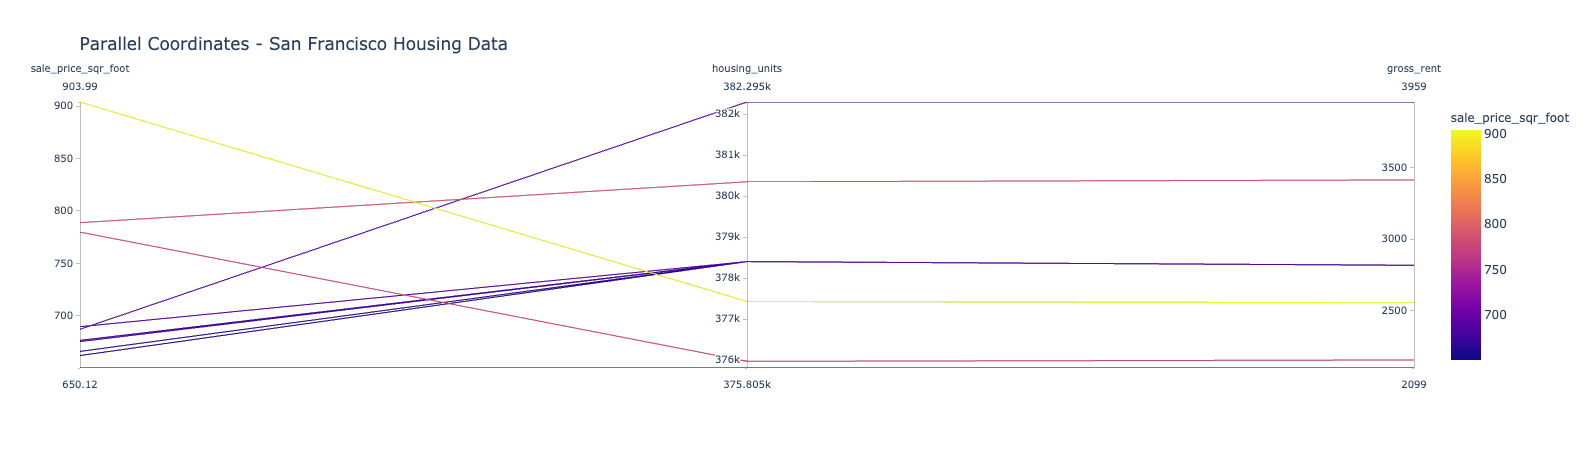

In [57]:
# Parallel Coordinates Plot
par_cols = ['sale_price_sqr_foot', 'housing_units', 'gross_rent']
parallel_coor = px.parallel_coordinates(
    neighborhood_par,  
    color ='sale_price_sqr_foot', 
    dimensions=par_cols, 
    title="Parallel Coordinates - San Francisco Housing Data")
parallel_coor.show()

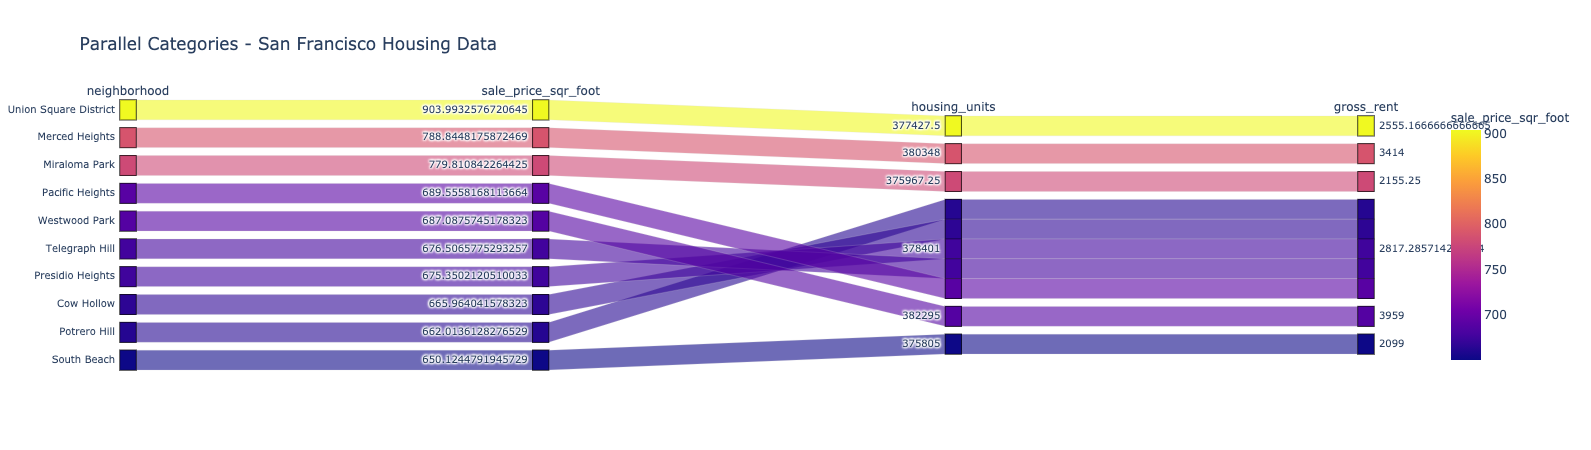

In [58]:
# Parallel Categories Plot
par_cat = ['neighborhood', 'sale_price_sqr_foot', 'housing_units', 'gross_rent']
parallel_cat = px.parallel_categories(
    neighborhood_par,  
    color ='sale_price_sqr_foot', 
    dimensions=par_cat, 
    title="Parallel Categories - San Francisco Housing Data"
    )
parallel_cat.show()

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [19]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [20]:
df_locations = df_neighborhood_locations.rename(columns={"Neighborhood" : "neighborhood", "Lat" : "lat", "Lon" : "lon"})
df_locations.head()

,neighborhood,lat,lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


In [21]:
# Reset Index for df_neighborhood_locations
df_locations.set_index("neighborhood", inplace=True)
df_locations.head()

,lat,lon
neighborhood,,
Alamo Square,37.791012,-122.402100
Anza Vista,37.779598,-122.443451
Bayview,37.734670,-122.401060
Bayview Heights,37.728740,-122.410980
Bernal Heights,37.728630,-122.443050


In [22]:
# Sort neighborhood_parallel data frame
neighborhood_parallel.sort_values(by=['neighborhood'], ascending=True, inplace=True)
neighborhood_parallel.head()

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Alamo Square,366.020712,378401.0,2817.285714
Anza Vista,373.382198,379050.0,3031.833333
Bayview,204.588623,376454.0,2318.400000
Bayview Heights,590.792839,382295.0,3739.000000
Bernal Heights,576.746488,379374.5,3080.333333


In [23]:
# Mean values had already been a part of the neighborhood_parallel data frame above
# Join the average values with the neighborhood locations
location_final = pd.concat(
    [neighborhood_parallel, 
    df_locations], 
    sort=False, 
    axis=1, 
    verify_integrity=True,                           
    )
location_final.dropna(inplace=True)
location_final.head()

,sale_price_sqr_foot,housing_units,gross_rent,lat,lon
Alamo Square,366.020712,378401.0,2817.285714,37.791012,-122.402100
Anza Vista,373.382198,379050.0,3031.833333,37.779598,-122.443451
Bayview,204.588623,376454.0,2318.400000,37.734670,-122.401060
Bayview Heights,590.792839,382295.0,3739.000000,37.728740,-122.410980
Buena Vista Park,452.680591,378076.5,2698.833333,37.768160,-122.439330


In [24]:
location_final = location_final.rename_axis('neighborhood')
location_final.head()

,sale_price_sqr_foot,housing_units,gross_rent,lat,lon
neighborhood,,,,,
Alamo Square,366.020712,378401.0,2817.285714,37.791012,-122.402100
Anza Vista,373.382198,379050.0,3031.833333,37.779598,-122.443451
Bayview,204.588623,376454.0,2318.400000,37.734670,-122.401060
Bayview Heights,590.792839,382295.0,3739.000000,37.728740,-122.410980
Buena Vista Park,452.680591,378076.5,2698.833333,37.768160,-122.439330


### Mapbox Visualization

Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

In [25]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("MAPBOX_API_KEY")

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)


In [26]:
location_final.reset_index(inplace=True)
location_final.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent,lat,lon
0,Alamo Square,366.020712,378401.0,2817.285714,37.791012,-122.402100
1,Anza Vista,373.382198,379050.0,3031.833333,37.779598,-122.443451
2,Bayview,204.588623,376454.0,2318.400000,37.734670,-122.401060
3,Bayview Heights,590.792839,382295.0,3739.000000,37.728740,-122.410980
4,Buena Vista Park,452.680591,378076.5,2698.833333,37.768160,-122.439330


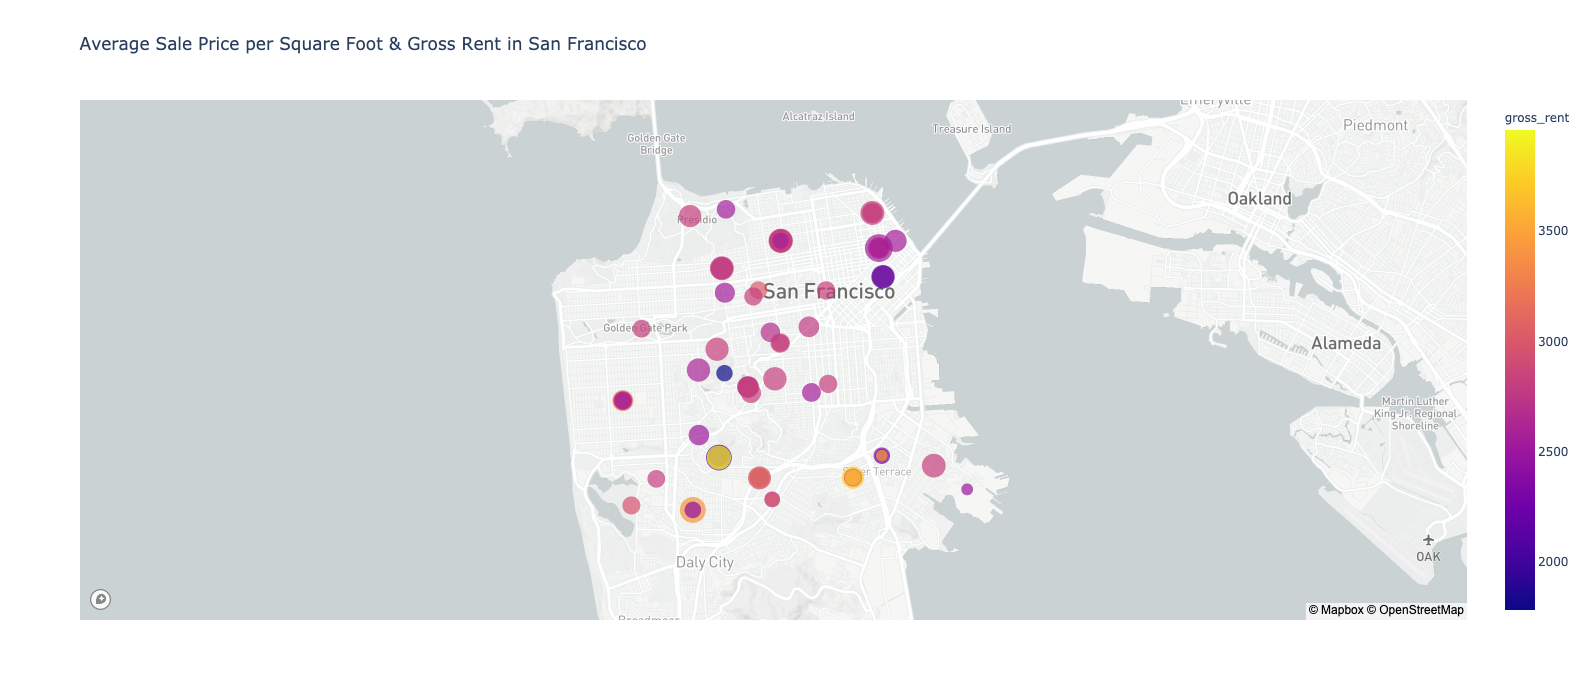

In [59]:
# Plot Data
map_sf = px.scatter_mapbox(location_final, 
                           lat="lat", 
                           lon="lon", 
                           color="gross_rent", 
                           size="sale_price_sqr_foot", 
                           zoom=11, 
                           height=700, 
                           width=700,
                           title="Average Sale Price per Square Foot & Gross Rent in San Francisco"
                          )

# Display the map
map_sf.show()